In [1]:
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.utils import plot_model

from keras.layers import Concatenate
import cv2

from glob import glob
import os
import pandas as pd
import numpy as np

import pickle

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
def load_data(p):
  patern = os.path.join(p,'*.png')
  files = glob(patern)
  X=[]
  Y = []
  for i in files:
    char = list(os.path.splitext(os.path.basename(i))[0])
    if len(char)!=4:
      continue
    img = cv2.imread(i)
    img  = (255-img[:,:,2])/255
    X.append(img)
    Y.append(char)
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

In [3]:
x,y = load_data('../../part4_Machine Learning/Noron/2_1_Convolutional/train/')

In [4]:
x_test,y_test = load_data('../../part4_Machine Learning/Noron/2_1_Convolutional/test/')

In [5]:
x.shape

(9843, 24, 72)

In [6]:
encoder = LabelEncoder()
encoder.fit(y.reshape(-1))
with open('encoder.bin','wb')as f:
  pickle.dump(encoder,f)

In [7]:
encoder.classes_

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [8]:
y_encoded = encoder.transform(y.reshape(-1)).reshape(-1,4)
y_test_encoded = encoder.transform(y_test.reshape(-1)).reshape(-1,4)

In [9]:
y_t = to_categorical(y_encoded)
y_test_t = to_categorical(y_test_encoded)

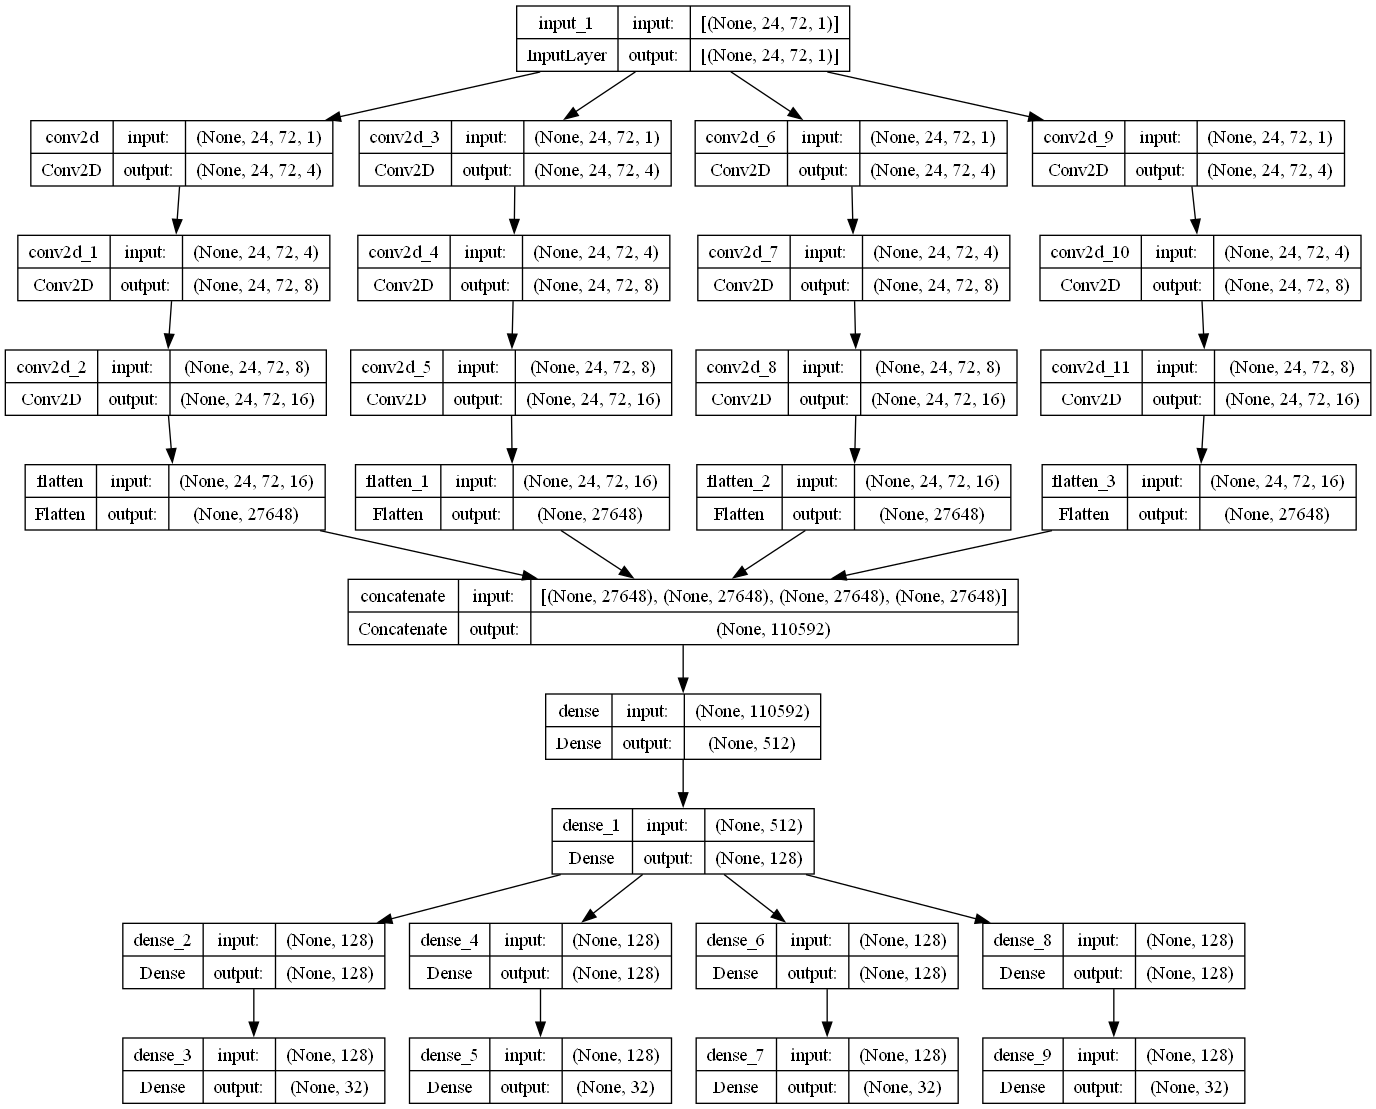

In [10]:
input = Input(shape=(24,72,1))

x1 = (Conv2D(4,(3,3),padding='same'))(input)  # (3,3) عکس کوچیک
x1 = (Conv2D(8,(3,3),padding='same'))(x1)
x1 = (Conv2D(16,(3,3),padding='same'))(x1)

x2 = (Conv2D(4,(3,3),padding='same'))(input)  # (3,3) عکس کوچیک
x2 = (Conv2D(8,(3,3),padding='same'))(x2)
x2 = (Conv2D(16,(3,3),padding='same'))(x2)

x3 = (Conv2D(4,(3,3),padding='same'))(input)  # (3,3) عکس کوچیک
x3 = (Conv2D(8,(3,3),padding='same'))(x3)
x3 = (Conv2D(16,(3,3),padding='same'))(x3)

x4 = (Conv2D(4,(3,3),padding='same'))(input)  # (3,3) عکس کوچیک
x4 = (Conv2D(8,(3,3),padding='same'))(x4)
x4 = (Conv2D(16,(3,3),padding='same'))(x4)

Flatten1= Flatten()(x1)
Flatten2= Flatten()(x2)
Flatten3= Flatten()(x3)
Flatten4= Flatten()(x4)

merge = Concatenate()([Flatten1,Flatten2,Flatten3,Flatten4])

h = (Dense(512,activation='relu'))(merge)
h = (Dense(128,activation='relu'))(h)
hh1 = (Dense(128,activation='relu'))(h)

out1 = Dense(32, activation='softmax')(hh1)
hh2 = (Dense(128,activation='relu'))(h)

out2 = Dense(32, activation='softmax')(hh2)
hh3 = (Dense(128,activation='relu'))(h)

out3 = Dense(32, activation='softmax')(hh3)
hh4 = (Dense(128,activation='relu'))(h)

out4 = Dense(32, activation='softmax')(hh4)

M1 = Model(inputs=input, outputs=[out1,out2,out3,out4])
M1.compile(optimizer='adam', loss='categorical_crossentropy')


plot_model(M1,show_shapes=True,show_layer_names=True)

In [11]:
H = M1.fit(x,[y_t[:,0],y_t[:,1],y_t[:,2],y_t[:,3]],epochs=10)

Epoch 1/10
308/308 [==============================] - 30s 83ms/step - loss: 12.0973 - dense_3_loss: 3.0182 - dense_5_loss: 3.0809 - dense_7_loss: 2.9935 - dense_9_loss: 3.0046
Epoch 2/10
308/308 [==============================] - 30s 96ms/step - loss: 6.6512 - dense_3_loss: 1.5552 - dense_5_loss: 1.7222 - dense_7_loss: 1.6705 - dense_9_loss: 1.7033
Epoch 3/10
308/308 [==============================] - 29s 93ms/step - loss: 3.9915 - dense_3_loss: 0.9197 - dense_5_loss: 1.0521 - dense_7_loss: 1.0166 - dense_9_loss: 1.0031
Epoch 4/10
308/308 [==============================] - 37s 119ms/step - loss: 2.6596 - dense_3_loss: 0.6450 - dense_5_loss: 0.6907 - dense_7_loss: 0.6541 - dense_9_loss: 0.6698
Epoch 5/10
308/308 [==============================] - 27s 88ms/step - loss: 1.8830 - dense_3_loss: 0.4229 - dense_5_loss: 0.5294 - dense_7_loss: 0.4371 - dense_9_loss: 0.4935
Epoch 6/10
308/308 [==============================] - 27s 88ms/step - loss: 1.4361 - dense_3_loss: 0.3363 - dense_5_loss: 0

In [ ]:
plt.plot(H['loss'])

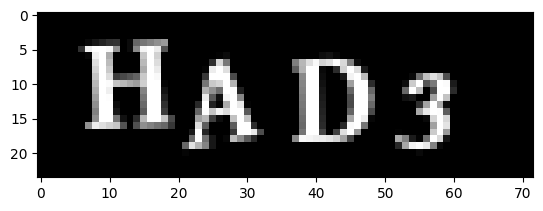

In [16]:
im = x_test[33]

plt.imshow(im,'gray');

In [17]:
p = M1.predict(im.reshape(1,24,72,1))
p

1/1 [==============================] - 0s 35ms/step


[array([[3.7407082e-29, 0.0000000e+00, 1.9744081e-34, 1.1481940e-31,
         3.8941700e-24, 7.0087698e-30, 4.3649541e-26, 1.6899316e-23,
         7.1816461e-26, 4.6987251e-13, 3.5108617e-25, 2.8176759e-05,
         1.9451422e-17, 1.3466693e-21, 1.6519716e-12, 9.9996519e-01,
         0.0000000e+00, 1.0346161e-15, 4.1004291e-35, 6.8847116e-12,
         2.5172711e-11, 4.0408649e-12, 8.5283547e-10, 8.0346206e-13,
         1.7541957e-24, 1.2467238e-31, 2.4117973e-08, 3.2087308e-27,
         6.6906650e-06, 3.8107988e-26, 2.3285722e-32, 1.6131517e-17]],
       dtype=float32),
 array([[9.7273707e-17, 2.3722327e-10, 1.8736564e-15, 6.3901996e-07,
         2.8552403e-16, 3.1763145e-27, 6.6572005e-07, 1.3550252e-11,
         9.9921095e-01, 1.6962385e-13, 7.7941725e-36, 1.2433447e-36,
         4.3843387e-23, 1.5832765e-29, 2.6268804e-24, 2.6184609e-28,
         7.0203896e-37, 2.6265546e-13, 1.0724715e-22, 1.9342136e-26,
         4.4227070e-11, 6.9425102e-32, 0.0000000e+00, 1.2043894e-11,
         

In [18]:
for i in p:
    # print(np.argmax(i))
    print(encoder.inverse_transform([np.argmax(i)]))

['H']
['A']
['D']
['3']


In [19]:
M1.save('model2.h5')